In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import fastprop
import os
from rdkit import Chem
import scipy
from matplotlib import cm
from matplotlib.colors import Normalize 
import seaborn as sns
from sklearn.metrics import mean_squared_error 
from pathlib import Path
from scipy.stats import pearsonr
import fastsolv as fastsolv
from fastsolv_analysis.util import parity_plot, solprop_parity_plot, stats, residual_cumsum

C:\Users\ChemeGrad2021\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\utilities\migration\utils.py:56: The loaded checkpoint was produced with Lightning v2.3.1, which is newer than your current Lightning version: v2.2.4


In [3]:
matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

colors = sns.color_palette(palette='Accent').as_hex()

Set source directory

In [14]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results")

Load pre-computed predictions of Solution fastprop model predictions on the SolProp test set

In [15]:
fastprop_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "fastprop_5215_predictions/solprop_fastprop_nonaq_predictions.csv"))
fastprop_predictions[['solvent_smiles', 'solute_smiles']] = fastprop_predictions['smiles'].str.split('.', n=1, expand=True)
solute_smiles = fastprop_predictions.pop('solute_smiles')  
solvent_smiles = fastprop_predictions.pop('solvent_smiles')  

both = fastprop_predictions.pop('smiles')  

fastprop_predictions.insert(0, 'solvent_smiles', solvent_smiles) 
fastprop_predictions.insert(0, 'solute_smiles', solute_smiles) 


# also load solprop features
solprop_features: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "fastprop_5215_predictions/solprop_fastprop_nonaq.csv"))

Load pre-computed predictions of solutions chemprop model predictions on the SolProp test set

In [13]:
chemprop_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "chemprop_5215_predictions/solprop_chemprop_nonaq_predictions.csv"))

Analysis of the error distributions as a funciton of various descriptors across the datasets for both the solution chemprop and fastprop models. 

In [16]:
merged_fastprop = solprop_features.merge(fastprop_predictions, on=['solute_smiles', 'solvent_smiles', 'temperature'], how='left')
merged_chemprop = solprop_features.merge(chemprop_predictions, on=['solute_smiles', 'solvent_smiles', 'temperature'], how='left')

# Calculate residuals for each model
merged_fastprop['squared_residual'] = (merged_fastprop['logS_true'] - merged_fastprop['logS_pred'])**2
merged_chemprop['squared_residual'] = (merged_chemprop['logS_true'] - merged_chemprop['logS_pred'])**2

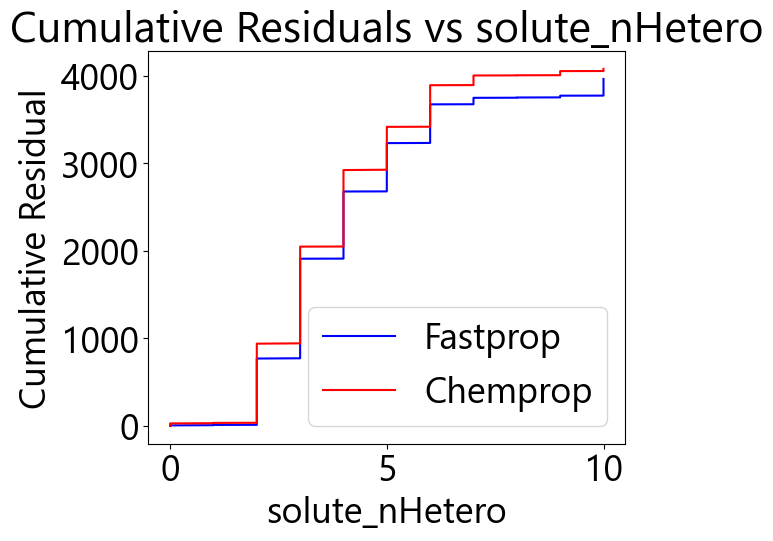

In [17]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_nHetero')

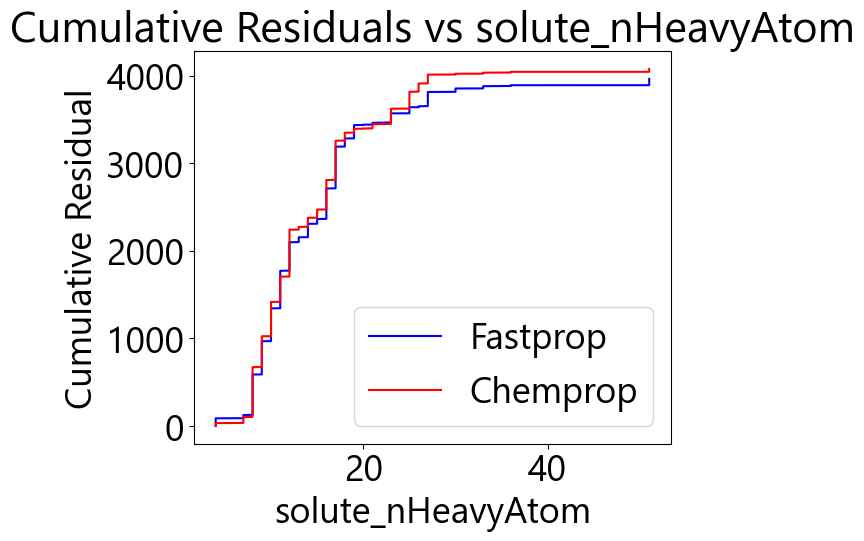

In [18]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_nHeavyAtom')

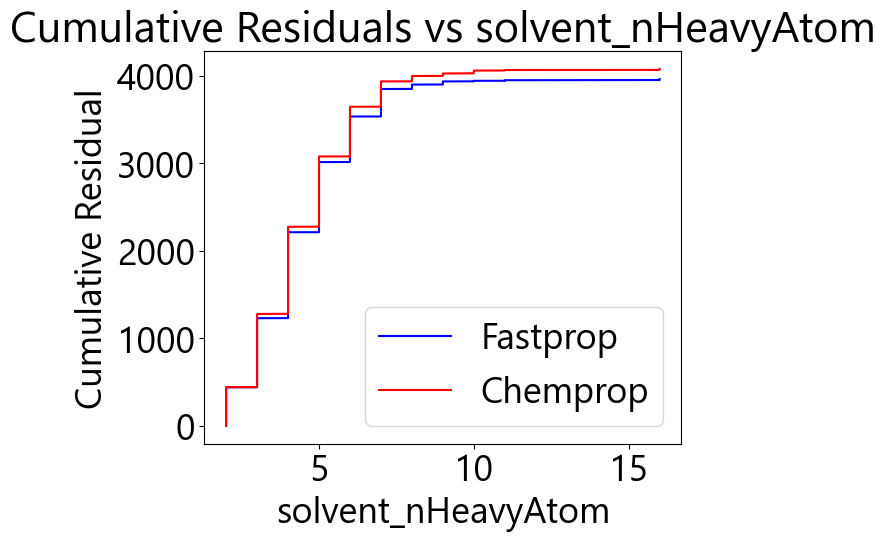

In [19]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solvent_nHeavyAtom')

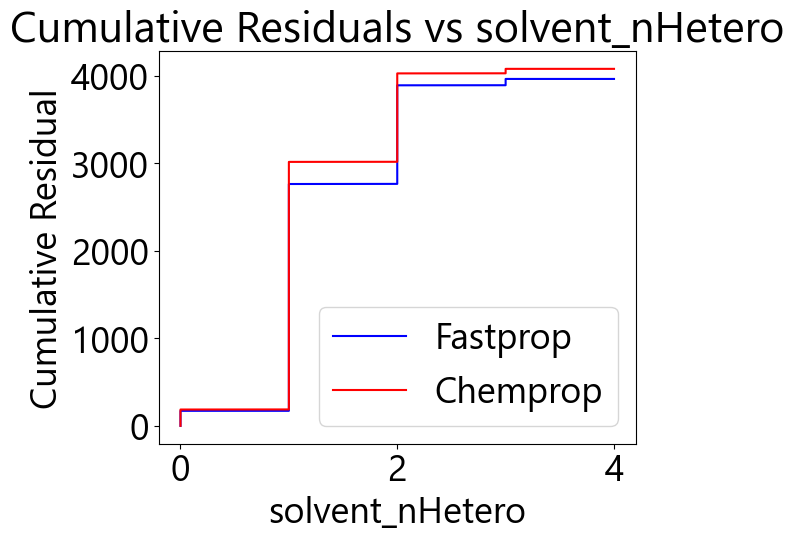

In [20]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solvent_nHetero')


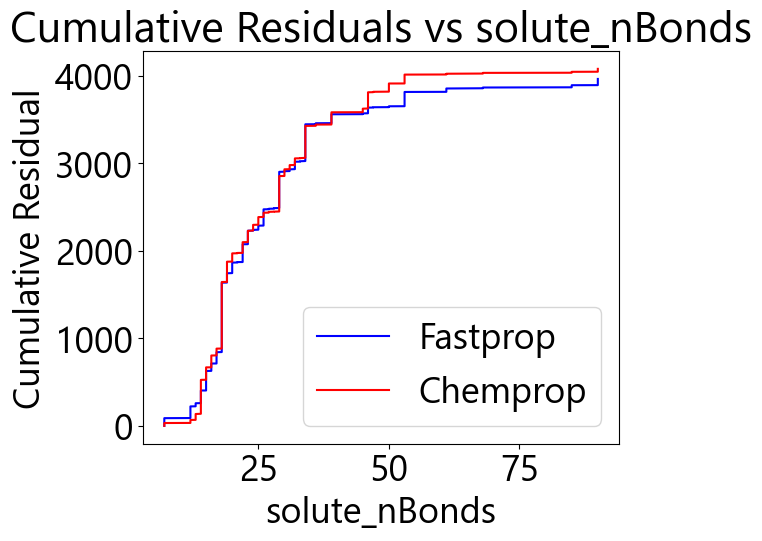

In [21]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_nBonds')

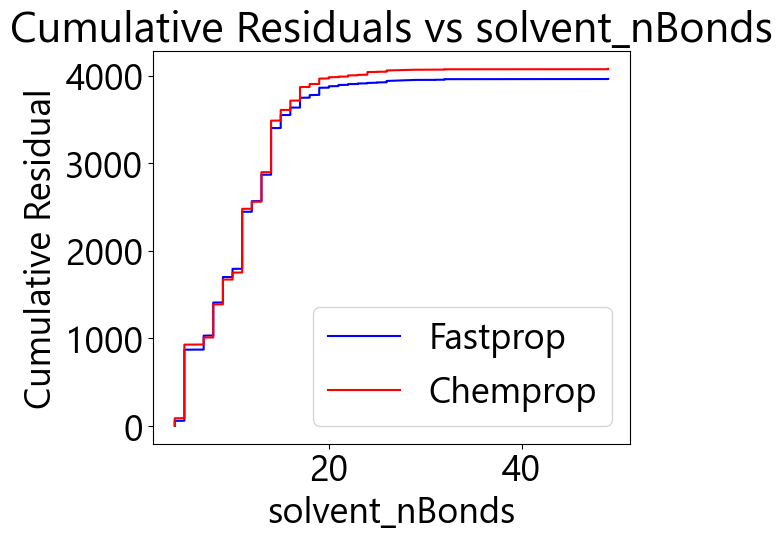

In [22]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solvent_nBonds')

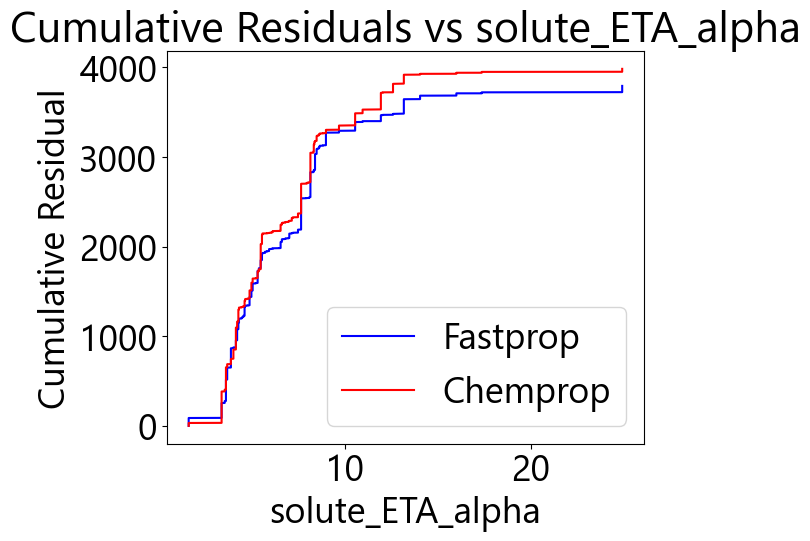

In [23]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_ETA_alpha')

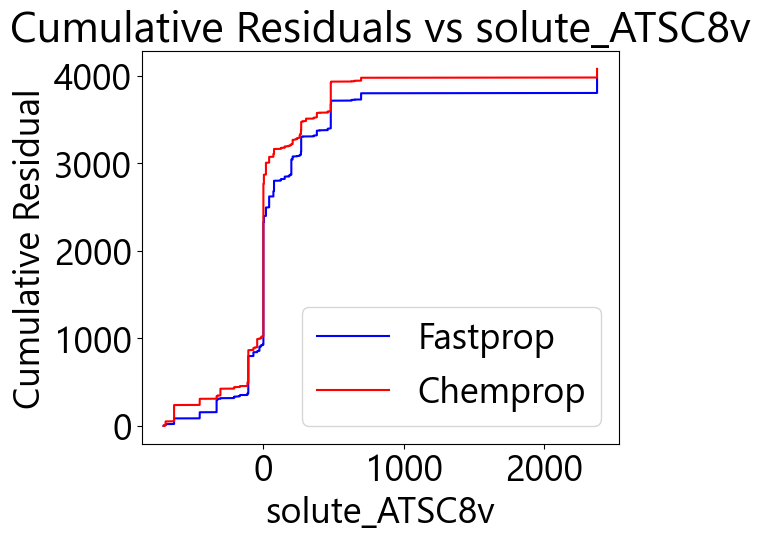

In [24]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_ATSC8v')

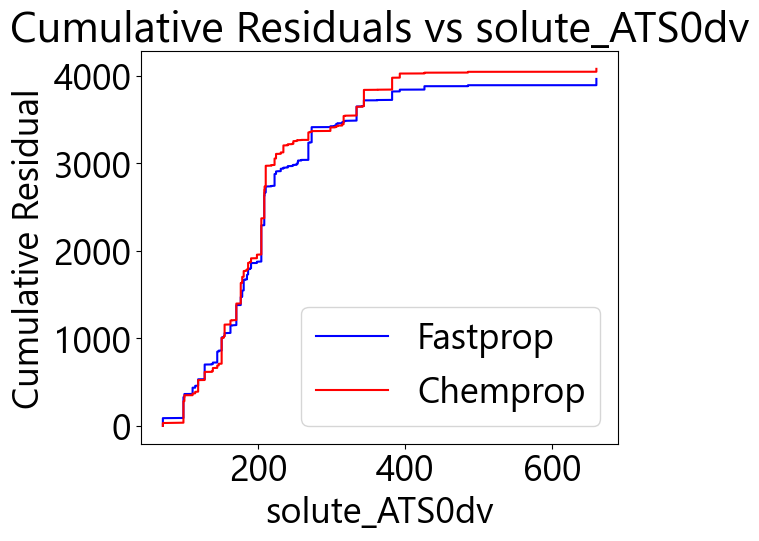

In [25]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_ATS0dv')

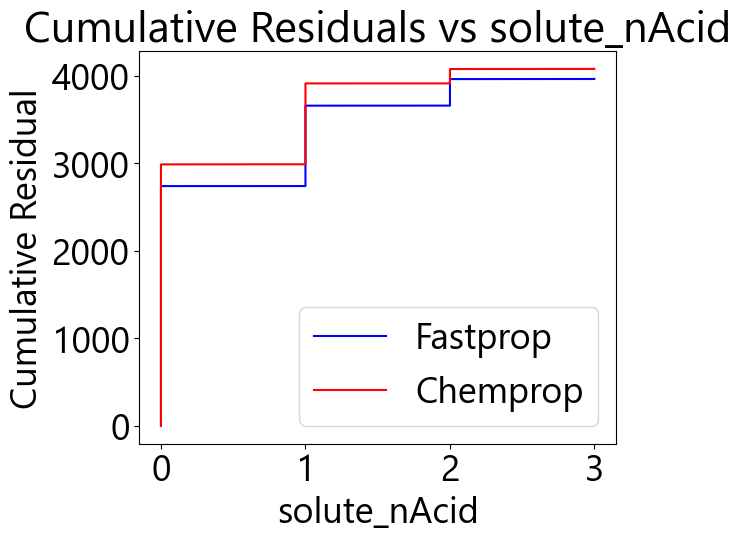

In [26]:
residual_cumsum(merged_fastprop, merged_chemprop, 'solute_nAcid')

Analysis of the correlation between the model predictions on the SolProp test set

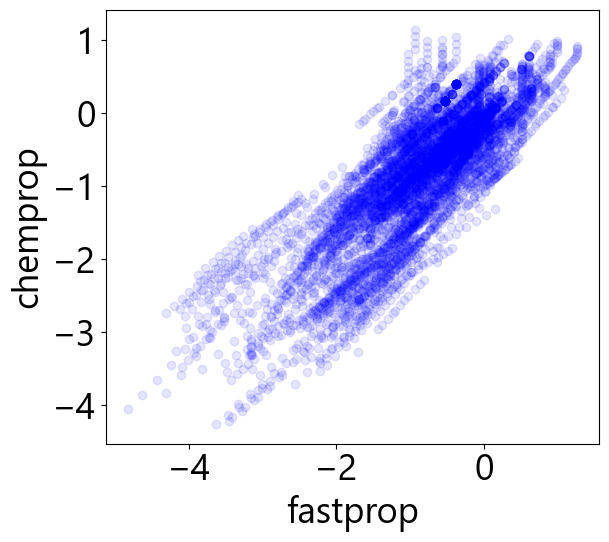

In [28]:
plt.figure(figsize=(12, 6))
r = pearsonr(merged_fastprop['logS_pred'], merged_chemprop['logS_pred'])
plt.subplot(1, 2, 1)
plt.scatter(merged_fastprop['logS_pred'], merged_chemprop['logS_pred'], color='blue', alpha = 0.1)
plt.xlabel('fastprop')
plt.ylabel('chemprop')
plt.tight_layout()
plt.show()


In [31]:
r = pearsonr(merged_fastprop['logS_pred'], merged_chemprop['logS_pred'])
print("Pearson R between solution chemprop and fastprop predictions on SolProp test set is: " + str(r[0]))

r = pearsonr(merged_fastprop['logS_pred'], merged_fastprop['logS_true'])
print("Pearson R between solution fastprop predictions and the experimental values on SolProp test set is: " + str(r[0]))

r = pearsonr(merged_chemprop['logS_pred'], merged_chemprop['logS_true'])
print("Pearson R between solution chemprop predictions and the experimental values on SolProp test set is: " + str(r[0]))

Pearson R between solution chemprop and fastprop predictions on SolProp test set is: 0.8112464448118477
Pearson R between solution fastprop predictions and the experimental values on SolProp test set is: 0.6440353025905857
Pearson R between solution chemprop predictions and the experimental values on SolProp test set is: 0.6379489294363208
